Name : Bhardiwala Mitkumar Rajesh
Reg_no : 21BAI1677
Branch :Vit Chennai
Batch : Morning

# Data preprocessing

1.Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Importing the dataset.

In [2]:
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.shape

(891, 12)

3.Checking for Null Values.

In [4]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#filling the null values of age with its median value
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


In [7]:
#replacing the null rows with column embarked with its mode
dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])


In [8]:
#as cabin has many null values ,but since it is of no use, we will drop it when splitting data

In [9]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

4.Data Visualization.

C:\Users\rajes\AppData\Local\Temp\ipykernel_13084\3387572453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

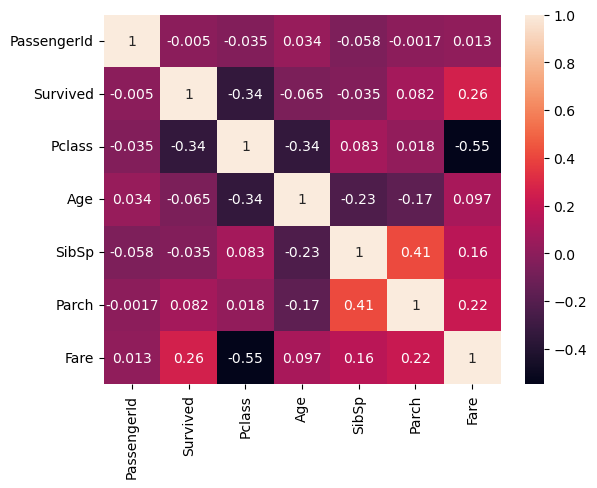

In [10]:
sns.heatmap(dataset.corr(),annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

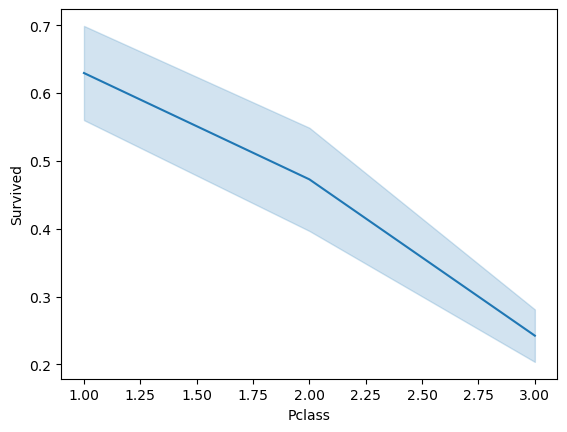

In [11]:
#It means that as the Plclass ticket is increasing, the survival rate is decreasing.
sns.lineplot(x="Pclass",y="Survived",data=dataset)

C:\Users\rajes\AppData\Local\Temp\ipykernel_13084\607986569.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=dataset['Survived'],x=dataset['Pclass'],ci=0)


<Axes: xlabel='Pclass', ylabel='Survived'>

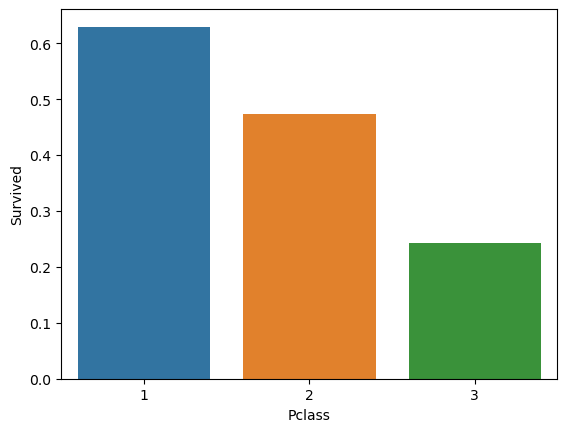

In [12]:
sns.barplot(y=dataset['Survived'],x=dataset['Pclass'],ci=0)

C:\Users\rajes\AppData\Local\Temp\ipykernel_13084\64701043.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=dataset['Survived'],x=dataset['Sex'],ci=0)


<Axes: xlabel='Sex', ylabel='Survived'>

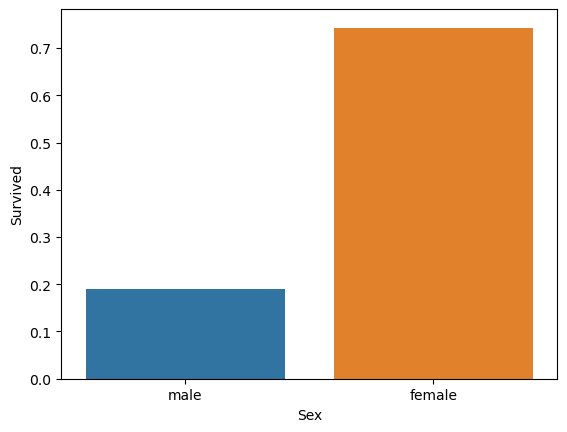

In [13]:
#mostly female have survived.
sns.barplot(y=dataset['Survived'],x=dataset['Sex'],ci=0)

C:\Users\rajes\AppData\Local\Temp\ipykernel_13084\347550664.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=dataset['Survived'],x=dataset['Embarked'],ci=0)


<Axes: xlabel='Embarked', ylabel='Survived'>

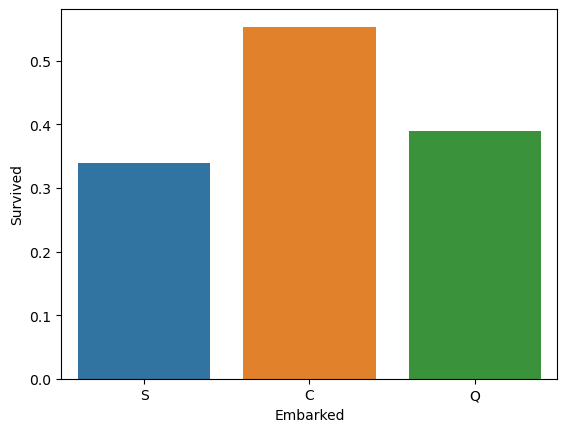

In [14]:
#Mostly passengers with embarked C have mostly survived.
sns.barplot(y=dataset['Survived'],x=dataset['Embarked'],ci=0)

5.Outlier Detection

<Axes: xlabel='Fare'>

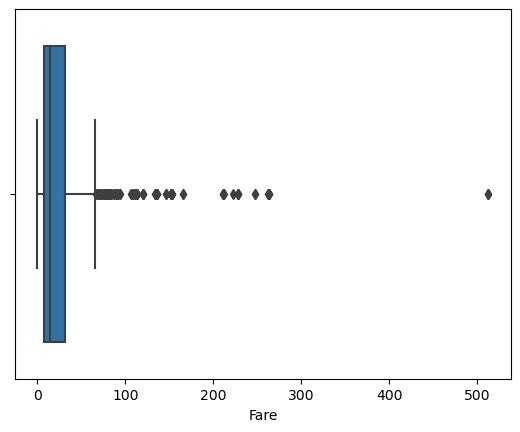

In [15]:
sns.boxplot(x=dataset["Fare"])

<Axes: >

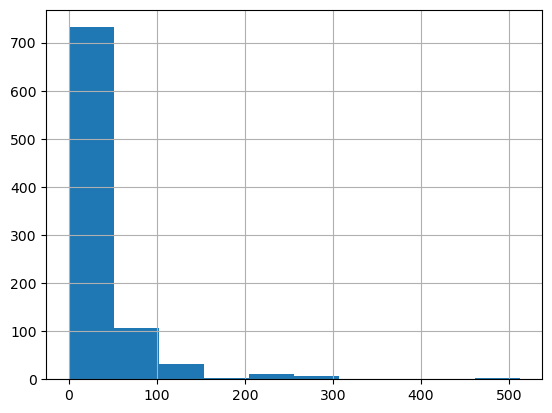

In [16]:
dataset['Fare'].hist()

In [17]:
print('skewness value of Age: ',dataset['Age'].skew())
print('skewness value of Fare: ',dataset['Fare'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893


Inference : It shows that fare has outliers that are left skewed.

In [18]:
#So we will use flooring and capping for removing outliers
Q1 = dataset['Fare'].quantile(0.25)
Q3 = dataset['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
dataset['Fare']=np.where(dataset['Fare']>upper_whisker,upper_whisker,np.where(dataset['Fare']<lower_whisker,lower_whisker,dataset['Fare']))


<Axes: xlabel='Fare'>

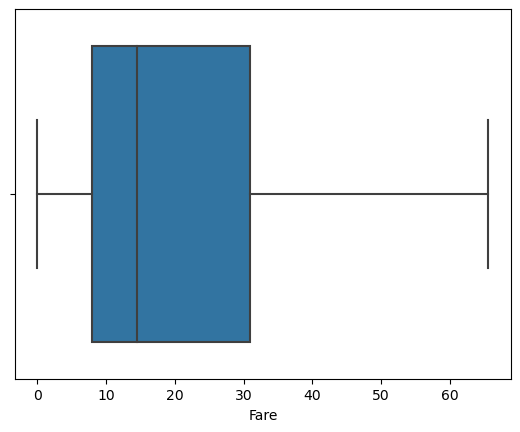

In [19]:
sns.boxplot(x=dataset["Fare"])

Inference: Hence We have successfully removed outliers.

6.Splitting Dependent and Independent variables

In [20]:
#dropping unecessary columns
dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [21]:
x=dataset.drop(columns=['Survived'])
y=dataset.iloc[:,0:1]

In [22]:
y.shape

(891, 1)

7.Perform Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

x["Sex"]=le.fit_transform(x["Sex"])
sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'Sex' column:", sex_mapping)


Mapping for 'Sex' column: {'female': 0, 'male': 1}


In [24]:
x["Embarked"]=le.fit_transform(x["Embarked"])

embarked_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping for 'Embarked' column:", embarked_mapping)

Mapping for 'Embarked' column: {'C': 0, 'Q': 1, 'S': 2}


8.Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
x=sc.fit_transform(x)


In [27]:
x

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.47367361,
        -0.82055245,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103, ..., -0.47367361,
         2.03162322, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.47367361,
        -0.78757757,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  2.00893337,
        -0.02915533,  0.58595414],
       [-1.56610693,  0.73769513, -0.25833709, ..., -0.47367361,
         0.29082313, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.47367361,
        -0.79612661, -0.67817453]])

9.Splitting Data into Train and Test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(623, 7)
(623, 1)
(268, 7)
(268, 7)


In [30]:
x.shape

(891, 7)